In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\ML Practice\py-master\DataScience\BangloreHomePrices\model\bengaluru_house_prices.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [8]:
df2=df.drop(['availability','society','area_type'],axis='columns')

In [14]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [15]:
df2.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [19]:
df2=df2.fillna(value={'balcony': round(df2.balcony.mean())})

In [20]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [23]:
df2=df2.dropna()

In [24]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [25]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [30]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [32]:
df2['BHK'] = df2['size'].apply(lambda x: x.split(' ')[0])
df2.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [42]:
df2.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1304, dtype: int64

In [43]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [44]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
        

In [51]:
df3 = df2[~(df2['total_sqft'].apply(is_float))]

In [54]:
df3.head()
df3.count()

location      190
size          190
total_sqft    190
bath          190
balcony       190
price         190
BHK           190
dtype: int64

In [72]:
def convert_sqft(x):
    tokens=x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
    

In [73]:
df4=df2.copy()
df4.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [74]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft) 
df4.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [79]:
df5=df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [82]:
len(df5.location.unique())

1304

In [86]:
df5.location = df5.location.apply(lambda x : x.strip())

In [96]:
pd.set_option('display.max_rows',None)
location_res = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_res

location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [104]:
len(location_res[location_res<15])

1107

In [107]:
loc_less_than_15 = location_res[location_res<15]
loc_less_than_15.count()

1107

In [108]:
df5.location = df5.location.apply(lambda x: 'other' if x in loc_less_than_15 else x)
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [115]:
len(df5.location.unique())

187

In [124]:
df5['BHK'] = pd.to_numeric(df5['BHK'])


In [125]:
df5.dtypes

location           object
size               object
total_sqft        float64
bath              float64
balcony           float64
price             float64
BHK                 int64
price_per_sqft    float64
dtype: object

In [126]:
df5[df5['total_sqft']/df5['BHK'] <200]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,3.627451e+04
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.00,8,3.333333e+04
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.00,8,6.296296e+03
70,other,3 Bedroom,500.0,3.0,2.0,100.00,3,2.000000e+04
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.00,6,2.253521e+04
119,Hennur Road,2 Bedroom,276.0,3.0,3.0,23.00,2,8.333333e+03
129,other,7 Bedroom,950.0,7.0,0.0,115.00,7,1.210526e+04
149,other,6 Bedroom,1034.0,5.0,2.0,185.00,6,1.789168e+04
176,Kumaraswami Layout,5 Bedroom,600.0,3.0,2.0,85.00,5,1.416667e+04
349,other,3 Bedroom,11.0,3.0,2.0,74.00,3,6.727273e+05


In [132]:
df6 = df5[~(df5['total_sqft']/df5['BHK'] <300)]

In [133]:
df6.shape

(12502, 8)

In [134]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [157]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std_dev = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>=(mean-std_dev)) & (subdf.price_per_sqft<=(mean+std_dev))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out
    

In [158]:
df7 = remove_outliers(df6)
df7.shape

(10345, 8)

In [162]:
df7.groupby('BHK')['BHK'].agg('count')

BHK
1      526
2     4814
3     4023
4      753
5      111
6       63
7       23
8       18
9        8
10       2
11       2
13       1
16       1
Name: BHK, dtype: int64

In [168]:
def scatter_plot(df,loc):
    bhk2 = df[(df.location==loc) & (df.BHK==2)]
    bhk3=df[(df.location==loc) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green')
    plt.xlabel("Total Sq Feet Area")
    plt.ylabel("price(in Lakh INR)")
    plt.legend
    
    

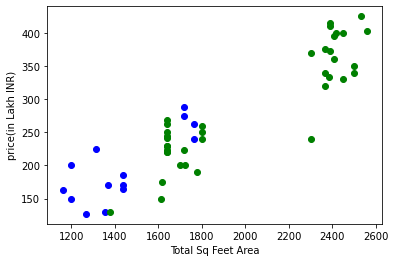

In [169]:
scatter_plot(df7,"Rajaji Nagar")

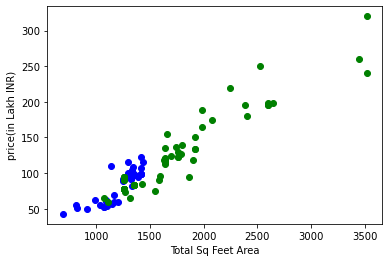

In [170]:
scatter_plot(df7,"Hebbal")

In [205]:
def remove_outliers_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
            for bhk, bhk_df in location_df.groupby('BHK'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

                

In [206]:
df8=remove_outliers_bhk(df7)

In [207]:
df8.shape


(7151, 8)

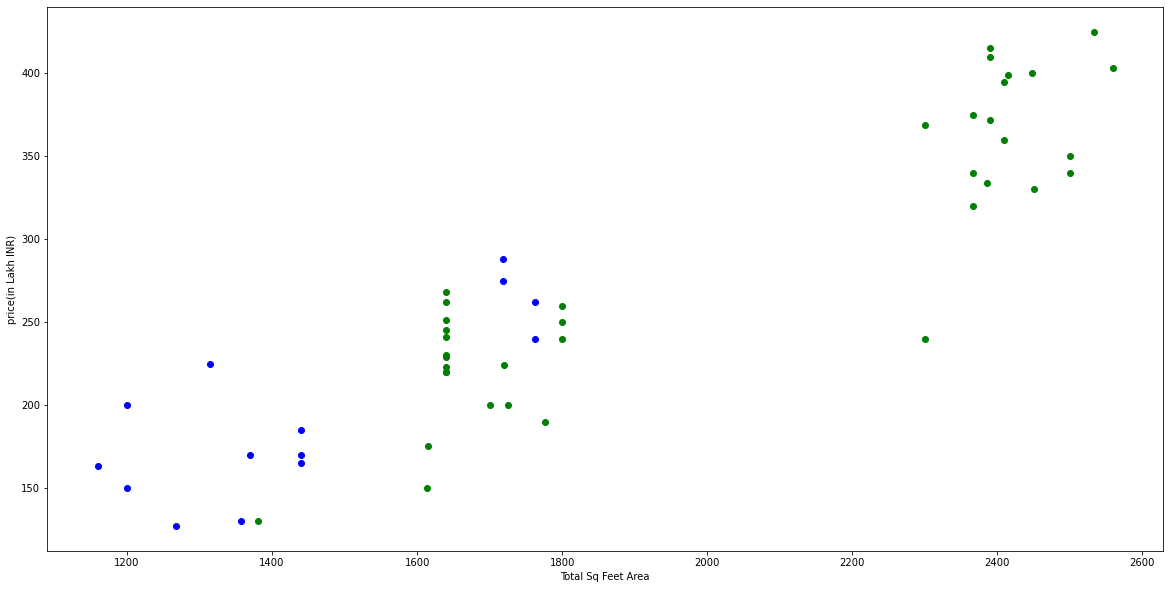

In [208]:
scatter_plot(df7,"Rajaji Nagar")


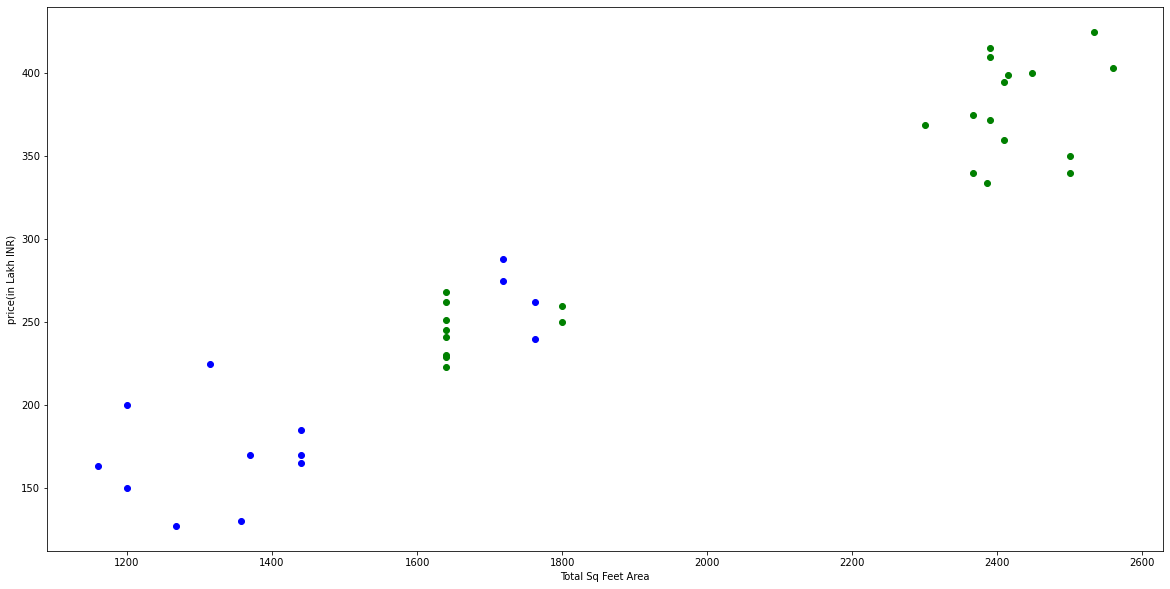

In [209]:
scatter_plot(df8,"Rajaji Nagar")

Text(0, 0.5, 'count')

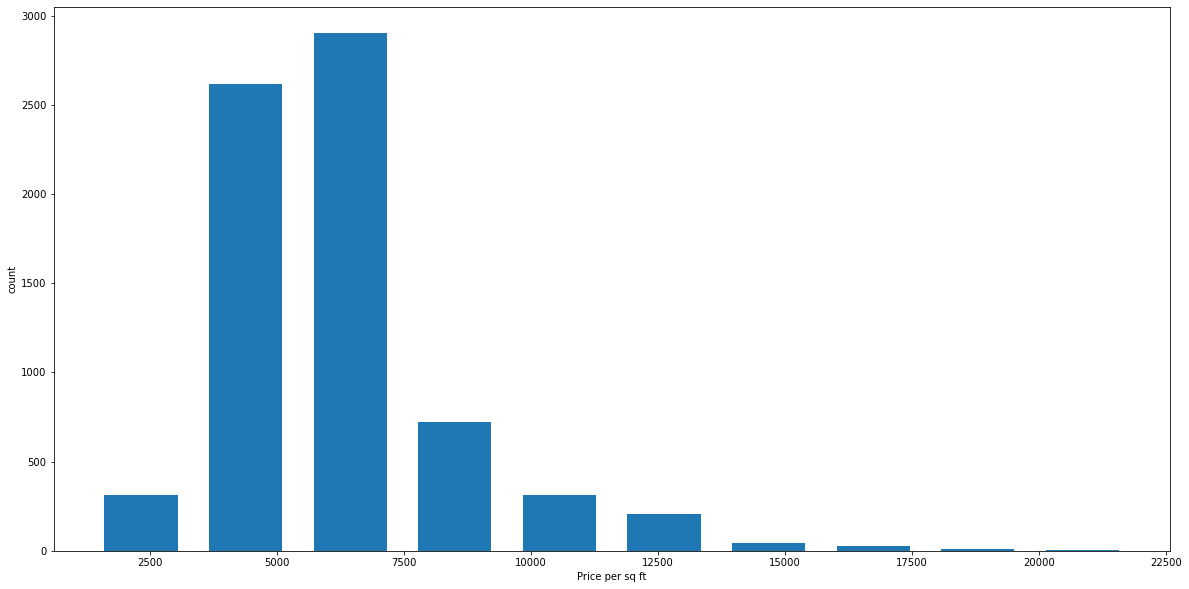

In [210]:

matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.7)
plt.xlabel('Price per sq ft')
plt.ylabel('count')


In [213]:
df8[df8.bath>2+ df8.BHK]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
6306,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8073,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
9914,other,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429


In [216]:
df9 = df8[df8.bath< 2+df8.BHK]

In [217]:
df9.shape

(7073, 8)

In [224]:
df9.head()

,location,total_sqft,bath,balcony,price,BHK
1,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3
5,1st Phase JP Nagar,2059.0,3.0,2.0,225.0,3
6,1st Phase JP Nagar,1394.0,2.0,1.0,100.0,2


In [229]:
dummies=pd.get_dummies(df9.location)
dummies.head()


,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')

In [233]:
df10.head()

,location,total_sqft,bath,balcony,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2059.0,3.0,2.0,225.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,1394.0,2.0,1.0,100.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
df10.drop('location',axis='columns',inplace=True)
df10.head()

,total_sqft,bath,balcony,price,BHK,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
1,1875.0,3.0,1.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,2.0,85.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,1.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2059.0,3.0,2.0,225.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1394.0,2.0,1.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
df10.shape

(7073, 191)

In [237]:
x = df10.drop('price',axis='columns')
y=df10.price

In [241]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=19)

In [242]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.831142791975025

In [250]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=19)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.83114279, 0.82590871, 0.78423217, 0.79059032, 0.8422782 ])

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
def best_model(x,y):
    algos={
        'linear_regression' : {
            'model':LinearRegression(),
            'params': {
                'normalize': [True,False]
                
            }
        },
        
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                 'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
        
        
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)
        gscv.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
        


        
    


In [271]:
best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.838512,{'normalize': False}
1,lasso,0.726129,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.737725,"{'criterion': 'mse', 'splitter': 'random'}"


In [275]:
def predict_price(location,sqft,bath,balcony,bhk):
    loc_index= np.where(x.columns==location)[0][0]
    
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=balcony
    X[3]=bhk
    if loc_index>=0:
        X[loc_index]=1
    return lr.predict([X])[0]


In [276]:
predict_price('1st Phase JP Nagar',1000, 2,1,2)

78.69856790755024

In [278]:
predict_price('Indira Nagar',1000, 2,2,2)

195.1590008597702

In [285]:
predict_price('Whitefield',2000, 2,2,4)

131.90158475615257

In [291]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)
    

In [293]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
    
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))